# tnc-edge-data-integration

This notebook analyses the effectiveness of data integration between software products on the edge. These integrations include:

1. gps data from EM systems -> edge machine
1. EM video files from EM systems -> edge machine
1. edge machine passing video files into AI model
1. edge machine parsing AI model output

This analysis is looking for the tightness and outliers of data delivery between systems, and categorization of different types of data integration errors.

In [147]:
# aws_config = {
# 'aws_access_key_id':'XXXXXXXX',
# 'aws_secret_access_key':'XXXXXXXX',
# 'aws_session_token':'XXXXXXXX'
# }

aws_config = {}

aws_config['profile_name'] ='XXXXXXXX'
aws_config['region_name'] = 'us-east-1'

import boto3

boto3.setup_default_session(**aws_config)

s3 = boto3.client('s3')

# s3.list_objects(Bucket='51-gema-dev-dp-raw' , Prefix='tnc_edge/')

import pandas
import numpy
import math
import awswrangler
from datetime import datetime, timezone, timedelta
from dateutil import parser
import pytz
import io

def display_full(x):
    pandas.set_option('display.max_rows', 5000)
    pandas.set_option('display.min_rows', 1000)
    pandas.set_option('display.max_columns', None)
    pandas.set_option('display.width', 2000)
    pandas.set_option('display.float_format', '{:20,.2f}'.format)
    pandas.set_option('display.max_colwidth', None)
    display(x)
    pandas.reset_option('display.max_rows')
    pandas.reset_option('display.max_columns')
    pandas.reset_option('display.width')
    pandas.reset_option('display.float_format')
    pandas.reset_option('display.max_colwidth')

try:
    import pyperclip
except ModuleNotFoundError:
    print('no copypaste functionality today... please `pip install pyperclip`')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [148]:
pasted_array = []
if pyperclip:
    buf = io.StringIO(pyperclip.paste())
    for l in buf.readlines():
        l = l.strip()
#         print(l)
        try:
            pasted_array.append(parser.isoparse(l))
        except ValueError as e:
            pass
pasted_array

[]

In [149]:
branc_gps = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_gpsdata where datetime > '2024-01-01'", database='tnc_edge')
branc_gps['datetime'] = pandas.to_datetime(branc_gps['datetime'], utc=True)
branc_gps['gps_datetime'] = pandas.to_datetime(branc_gps['gps_datetime'], utc=True)
stpat_gps = awswrangler.athena.read_sql_query(f"SELECT * from stpatrick_v1_gpsdata where datetime > '2024-01-01'", database='tnc_edge')
stpat_gps['datetime'] = pandas.to_datetime(stpat_gps['datetime'], utc=True)
stpat_gps['gps_datetime'] = pandas.to_datetime(stpat_gps['gps_datetime'], utc=True)

branc_gps

,datetime,gps_datetime,lat,lon,md_timestamp_added,md_file_name,md_ingest_uuid,partition_0,partition_1,partition_2
0,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:30:46+00:00,8.080837,-83.5375684,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
1,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:31:46+00:00,8.0808028,-83.5374755,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
2,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:32:46+00:00,8.0808091,-83.5373665,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
3,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:34:46+00:00,8.0808503,-83.5371283,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
4,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:37:46+00:00,8.0807166,-83.5368541,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
5,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:38:46+00:00,8.0807574,-83.5367147,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
6,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:41:46+00:00,8.0806327,-83.53644,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
7,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:42:46+00:00,8.0806281,-83.5363092,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
8,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:44:46+00:00,8.0806341,-83.5360683,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23
9,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:33:46+00:00,8.0808716,-83.5372404,2024-01-23 06:40:18,2024/1/23/1705991989-0.csv,20ebe579-ee93-4c2c-a92e-f0a334c3501d,2024,1,23


In [150]:
gps_rows = len(branc_gps) + len(stpat_gps)

print(branc_gps[['datetime', 	'gps_datetime', 	'lat', 	'lon']].to_csv()[:300])

gps_bytes = \
    len(branc_gps[['datetime', 	'gps_datetime', 	'lat', 	'lon']].to_csv()) + \
    len(stpat_gps[['datetime', 	'gps_datetime', 	'lat', 	'lon']].to_csv())


print("gps rows", gps_rows, 'gps MiB', gps_bytes/1024/1024)

,datetime,gps_datetime,lat,lon
0,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:30:46+00:00,8.080837,-83.5375684
1,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:31:46+00:00,8.0808028,-83.5374755
2,2024-01-23 04:46:01.117618+00:00,2024-01-23 04:32:46+00:00,8.0808091,-83.5373665
3,2024-01-23 04:46:01
gps rows 138432 gps MiB 11.43515682220459


In [151]:
branc_vids = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_video_files where last_modified <> '' and start_datetime = ''", database='tnc_edge')
print("could not process ", len(branc_vids))

branc_vids = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_video_files where start_datetime > '2024-01-01'", database='tnc_edge')
for col in ['last_modified','decrypted_datetime','start_datetime','reencoded_datetime']:
    branc_vids[col] = pandas.to_datetime(branc_vids[col], utc=True)
branc_vids = branc_vids.drop(columns=['md_timestamp_added', 'md_file_name', 'md_ingest_uuid', 'partition_0', 'partition_1', 'partition_2'])
    
stpat_vids = awswrangler.athena.read_sql_query(f"SELECT * from stpatrick_v1_video_files where start_datetime > '2024-01-01'", database='tnc_edge')
for col in ['last_modified','decrypted_datetime','start_datetime','reencoded_datetime']:
    stpat_vids[col] = pandas.to_datetime(stpat_vids[col], utc=True)
stpat_vids = stpat_vids.drop(columns=['md_timestamp_added', 'md_file_name', 'md_ingest_uuid', 'partition_0', 'partition_1', 'partition_2'])
    

stpat_vids

could not process  0


,original_path,last_modified,decrypted_path,decrypted_datetime,stdout,stderr,start_datetime,cam_name,reencoded_path,reencoded_datetime,reencoded_stdout,reencoded_stderr
0,/thalos/saintpatrick/videos/cam1/23-02-2024/21...,2024-02-23 22:00:04.588475+00:00,/videos/20240223T215500Z_cam1.avi,2024-02-23 22:08:14.839238+00:00,<NA>,<NA>,2024-02-23 21:55:00+00:00,cam1,<NA>,NaT,<NA>,<NA>
1,/thalos/saintpatrick/videos/cam2/23-02-2024/21...,2024-02-23 22:00:04.495902+00:00,/videos/20240223T215500Z_cam2.avi,2024-02-23 22:08:21.541349+00:00,<NA>,<NA>,2024-02-23 21:55:00+00:00,cam2,<NA>,NaT,<NA>,<NA>
2,/thalos/saintpatrick/videos/cam1/23-02-2024/21...,2024-02-23 21:20:03.176056+00:00,/videos/20240223T211500Z_cam1.avi,2024-02-23 21:26:21.377570+00:00,<NA>,<NA>,2024-02-23 21:15:00+00:00,cam1,/videos/20240223T211500Z_cam1_reenc.mkv,2024-02-23 21:27:37.440763+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...
3,/thalos/saintpatrick/videos/cam2/23-02-2024/21...,2024-02-23 21:20:02.830293+00:00,/videos/20240223T211500Z_cam2.avi,2024-02-23 21:26:27.645913+00:00,<NA>,<NA>,2024-02-23 21:15:00+00:00,cam2,/videos/20240223T211500Z_cam2_reenc.mkv,2024-02-23 21:27:53.903679+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...
4,/thalos/saintpatrick/videos/cam1/23-02-2024/21...,2024-02-23 21:25:04.399126+00:00,/videos/20240223T212000Z_cam1.avi,2024-02-23 21:31:34.611504+00:00,<NA>,<NA>,2024-02-23 21:20:00+00:00,cam1,/videos/20240223T212000Z_cam1_reenc.mkv,2024-02-23 21:33:10.947543+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...
5,/thalos/saintpatrick/videos/cam2/23-02-2024/21...,2024-02-23 21:25:04.226058+00:00,/videos/20240223T212000Z_cam2.avi,2024-02-23 21:31:41.374571+00:00,<NA>,<NA>,2024-02-23 21:20:00+00:00,cam2,/videos/20240223T212000Z_cam2_reenc.mkv,2024-02-23 21:33:27.372454+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...
6,/thalos/saintpatrick/videos/cam1/23-02-2024/21...,2024-02-23 21:30:03.240348+00:00,/videos/20240223T212500Z_cam1.avi,2024-02-23 21:36:48.572477+00:00,<NA>,<NA>,2024-02-23 21:25:00+00:00,cam1,/videos/20240223T212500Z_cam1_reenc.mkv,2024-02-23 21:38:44.270868+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...
7,/thalos/saintpatrick/videos/cam2/23-02-2024/21...,2024-02-23 21:30:03.011824+00:00,/videos/20240223T212500Z_cam2.avi,2024-02-23 21:36:54.816100+00:00,<NA>,<NA>,2024-02-23 21:25:00+00:00,cam2,/videos/20240223T212500Z_cam2_reenc.mkv,2024-02-23 21:39:00.885105+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...
8,/thalos/saintpatrick/videos/cam1/23-02-2024/21...,2024-02-23 21:35:03.159812+00:00,/videos/20240223T213000Z_cam1.avi,2024-02-23 21:42:02.831708+00:00,<NA>,<NA>,2024-02-23 21:30:00+00:00,cam1,/videos/20240223T213000Z_cam1_reenc.mkv,2024-02-23 21:44:17.853589+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...
9,/thalos/saintpatrick/videos/cam2/23-02-2024/21...,2024-02-23 21:35:03.010760+00:00,/videos/20240223T213000Z_cam2.avi,2024-02-23 21:42:09.507598+00:00,<NA>,<NA>,2024-02-23 21:30:00+00:00,cam2,/videos/20240223T213000Z_cam2_reenc.mkv,2024-02-23 21:44:34.495533+00:00,Setting pipeline to PAUSED ... Opening in BLOC...,NvMMLiteOpen : Block : BlockType = 277 NVMEDI...


In [152]:
vids_rows = len(branc_vids) + len(stpat_vids)

collist = ['original_path', 'last_modified', 'decrypted_path', 'decrypted_datetime', 'stdout', 'stderr', 'start_datetime', 'cam_name',  'reencoded_path', 'reencoded_datetime', 'reencoded_stdout', 'reencoded_stderr']
print(branc_vids[collist].loc[0].to_csv())

vids_bytes = \
    len(branc_vids[collist].to_csv()) + \
    len(stpat_vids[collist].to_csv())


print("vids rows", vids_rows, 'vids MiB', vids_bytes/1024/1024)

,0
original_path,/thalos/brancol/videos/cam2/24-01-2024/02/24-01-2024-02-10.avi
last_modified,2024-01-24 02:15:01.144302+00:00
decrypted_path,
decrypted_datetime,2024-01-24 02:19:53.600052+00:00
stdout,
stderr,"cp: cannot open '/thalos/brancol/videos/cam2/24-01-2024/02/24-01-2024-02-10.avi' for reading: No such file or directory
"
start_datetime,2024-01-24 02:10:00+00:00
cam_name,cam2
reencoded_path,
reencoded_datetime,
reencoded_stdout,
reencoded_stderr,

vids rows 40912 vids MiB 37.74422740936279


In [153]:
a = branc_vids.loc[branc_vids.apply(lambda x: pandas.notna(x['original_path']) and pandas.isna(x['decrypted_path']), axis=1)]
# print("failed to look at videos",len(a))
# display_full(a.sort_values('start_datetime'))

b = stpat_vids.loc[stpat_vids.apply(lambda x: pandas.notna(x['original_path']) and pandas.isna(x['decrypted_path']), axis=1)]


print("failed to look at # videos:",len(a) + len(b))

failed to look at # videos: 444


In [154]:
a = branc_vids.loc[branc_vids.apply(lambda x: pandas.notna(x['reencoded_path']), axis=1)]

# display_full(a.loc[409])

a = branc_vids.loc[branc_vids.apply(lambda x: pandas.notna(x['reencoded_stdout']) and 'Execution ended after' not in x['reencoded_stdout'], axis=1)]
# display_full(a.loc[681])
# display_full(a.loc[1387])
# display_full(a)
print("branc errored transcodes", len(a))


b = stpat_vids.loc[stpat_vids.apply(lambda x: pandas.notna(x['reencoded_stdout']) and 'Execution ended after' not in x['reencoded_stdout'], axis=1)]
# display_full(b.loc[18376])
print("stpat errored transcodes", len(b))

# taken from operational logs when copying avi files onto usb sticks
average_size_per_avi = 314460123.9/1024/1024
# a
print('average_size_per_avi ', average_size_per_avi)

a = branc_vids.loc[branc_vids.apply(lambda x: pandas.notna(x['decrypted_path']), axis=1)]
b = stpat_vids.loc[stpat_vids.apply(lambda x: pandas.notna(x['decrypted_path']), axis=1)]
print("video copied", len(b) + len(a), "MiB of video copied (estimate)", (len(b) + len(a))*average_size_per_avi)

branc errored transcodes 75
stpat errored transcodes 53
average_size_per_avi  299.89254369735715
video copied 40468 MiB of video copied (estimate) 12136051.45834465


In [155]:
# branc_aiout = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_aifishdata where datetime > '2024-01-01' limit 10;", database='tnc_edge')
# print("could not process ", len(branc_aiout))


branc_aiout = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_aifishdata where datetime > '2024-01-01'", database='tnc_edge')
for col in ['datetime']:
    branc_aiout[col] = pandas.to_datetime(branc_aiout[col], utc=True)
for col in ['count','runtimems','detection_confidence']:
    branc_aiout[col] = pandas.to_numeric(branc_aiout[col])
branc_aiout = branc_aiout.drop(columns=['md_timestamp_added', 'md_file_name', 'md_ingest_uuid', 'partition_0', 'partition_1', 'partition_2'])
branc_aiout

,id,video_uri,processing_uri,output_uri,datetime,count,runtimems,detection_confidence,status
0,20313,/videos/20240312T213500Z_cam1.avi,/videos/processing/20240312T213500Z_cam1.avi,/videos/output/20240312T213500Z_cam1.json,2024-03-12 21:45:11.955227+00:00,0.0,11.999130,0.000000,done
1,20315,/videos/20240312T214000Z_cam1.avi,/videos/processing/20240312T214000Z_cam1.avi,/videos/output/20240312T214000Z_cam1.json,2024-03-12 21:50:13.769978+00:00,0.0,100863.530000,0.000000,done
2,20317,/videos/20240312T214500Z_cam1.avi,/videos/processing/20240312T214500Z_cam1.avi,/videos/output/20240312T214500Z_cam1.json,2024-03-12 21:55:15.588280+00:00,0.0,39878.195000,0.000000,done
3,20319,/videos/20240312T215000Z_cam1.avi,/videos/processing/20240312T215000Z_cam1.avi,/videos/output/20240312T215000Z_cam1.json,2024-03-12 22:00:17.604762+00:00,0.0,193747.110000,0.000000,done
4,20322,/videos/20240312T220000Z_cam1.avi,/videos/processing/20240312T220000Z_cam1.avi,/videos/output/20240312T220000Z_cam1.json,2024-03-12 22:10:22.075488+00:00,NaN,NaN,NaN,queued
5,20304,/videos/20240312T211500Z_cam1.avi,/videos/processing/20240312T211500Z_cam1.avi,/videos/output/20240312T211500Z_cam1.json,2024-03-12 21:25:03.834890+00:00,0.0,52893.040000,0.000000,done
6,20307,/videos/20240312T212000Z_cam1.avi,/videos/processing/20240312T212000Z_cam1.avi,/videos/output/20240312T212000Z_cam1.json,2024-03-12 21:30:05.895865+00:00,1.0,175902.530000,0.495648,done
7,20321,/videos/20240312T215500Z_cam1.avi,/videos/processing/20240312T215500Z_cam1.avi,/videos/output/20240312T215500Z_cam1.json,2024-03-12 22:05:19.785520+00:00,1.0,233301.220000,0.496208,done
8,20299,/videos/20240312T210500Z_cam1.avi,/videos/processing/20240312T210500Z_cam1.avi,/videos/output/20240312T210500Z_cam1.json,2024-03-12 21:14:59.774091+00:00,0.0,418984.500000,0.000000,done
9,20302,/videos/20240312T211000Z_cam1.avi,/videos/processing/20240312T211000Z_cam1.avi,/videos/output/20240312T211000Z_cam1.json,2024-03-12 21:20:01.684330+00:00,0.0,355027.030000,0.000000,done


In [156]:
a = branc_aiout.loc[branc_aiout['runtimems'] < 100]
a.sort_values('runtimems')


,id,video_uri,processing_uri,output_uri,datetime,count,runtimems,detection_confidence,status
4825,16226,/videos/20240221T201500Z_cam1.avi,/videos/processing/20240221T201500Z_cam1.avi,/videos/output/20240221T201500Z_cam1.json,2024-02-21 20:25:25.134116+00:00,0.0,3.935099,0.0,done
4549,12974,/videos/20240211T175500Z_cam1.avi,/videos/processing/20240211T175500Z_cam1.avi,/videos/output/20240211T175500Z_cam1.json,2024-02-11 18:02:36.995195+00:00,0.0,3.986359,0.0,done
7517,18802,/videos/20240307T221000Z_cam1.avi,/videos/processing/20240307T221000Z_cam1.avi,/videos/output/20240307T221000Z_cam1.json,2024-03-07 22:21:19.553885+00:00,0.0,3.989458,0.0,done
7088,25722,/videos/20240331T165500Z_cam1.avi,/videos/processing/20240331T165500Z_cam1.avi,/videos/output/20240331T165500Z_cam1.json,2024-03-31 17:07:21.002995+00:00,0.0,3.994226,0.0,done
3209,11254,/videos/20240206T154000Z_cam1.avi,/videos/processing/20240206T154000Z_cam1.avi,/videos/output/20240206T154000Z_cam1.json,2024-02-06 15:48:23.556513+00:00,0.0,3.994226,0.0,done
10998,13095,/videos/20240212T140500Z_cam1.avi,/videos/processing/20240212T140500Z_cam1.avi,/videos/output/20240212T140500Z_cam1.json,2024-02-12 14:14:28.645481+00:00,0.0,3.997088,0.0,done
836,17942,/videos/20240226T221000Z_cam1.avi,/videos/processing/20240226T221000Z_cam1.avi,/videos/output/20240226T221000Z_cam1.json,2024-02-26 22:19:53.000274+00:00,0.0,3.997803,0.0,done
7779,21752,/videos/20240316T234000Z_cam1.avi,/videos/processing/20240316T234000Z_cam1.avi,/videos/output/20240316T234000Z_cam1.json,2024-03-16 23:47:16.716833+00:00,0.0,3.997803,0.0,done
4460,14457,/videos/20240216T141000Z_cam1.avi,/videos/processing/20240216T141000Z_cam1.avi,/videos/output/20240216T141000Z_cam1.json,2024-02-16 14:19:28.182110+00:00,0.0,3.998280,0.0,done
4396,21296,/videos/20240315T161000Z_cam1.avi,/videos/processing/20240315T161000Z_cam1.avi,/videos/output/20240315T161000Z_cam1.json,2024-03-15 16:20:48.817652+00:00,0.0,3.998518,0.0,done


smallest_runtimems_with_nonzero_detections 17464.404
max lateness 2438.837337316667


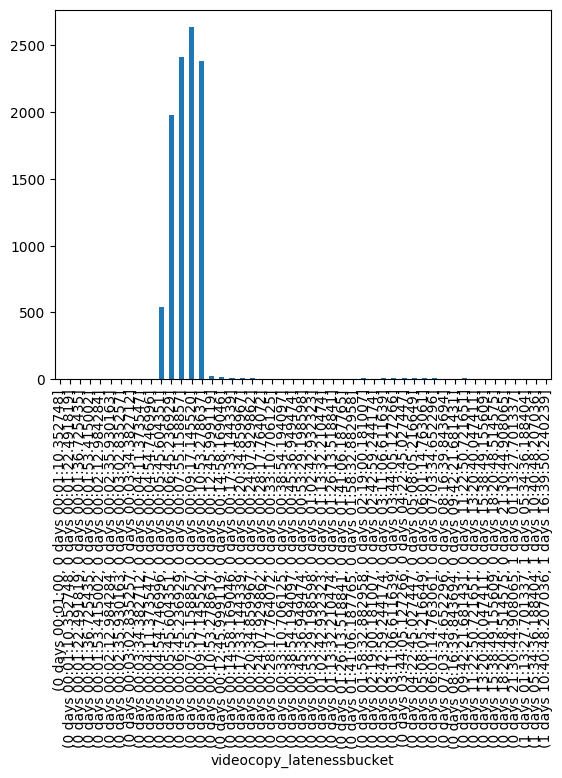

In [157]:

branc_vidsaiout = branc_vids.loc[branc_vids['cam_name'] == 'cam1'].join(branc_aiout.set_index('video_uri'), on='decrypted_path', how='left')
branc_vidsaiout['videocopy_found_unable_to_copy'] = pandas.notna(branc_vidsaiout['original_path']) & pandas.isna(branc_vidsaiout['decrypted_path'])


branc_vidsaiout['videocopy_lateness'] = branc_vidsaiout['decrypted_datetime'] - branc_vidsaiout['start_datetime']

branc_vidsaiout['videocopy_ok'] = pandas.notna(branc_vidsaiout['decrypted_path'])
# branc_vidsaiout.loc[pandas.isna(branc_vidsaiout['processing_uri'])]
branc_vidsaiout['ai_vidok_but_did_not_try'] = branc_vidsaiout['videocopy_ok'] & pandas.isna(branc_vidsaiout['processing_uri'])
branc_vidsaiout['ai_crash_no_output'] = branc_vidsaiout['videocopy_ok'] & ~ branc_vidsaiout['ai_vidok_but_did_not_try'] & (branc_vidsaiout['status'] == 'queued')
branc_vidsaiout['ai_outputed_but_cant_parse'] = branc_vidsaiout['videocopy_ok'] & ~ branc_vidsaiout['ai_vidok_but_did_not_try'] & (branc_vidsaiout['status'] == 'parsing')


i = branc_vidsaiout.loc[(branc_vidsaiout['count'] > 0) | (branc_vidsaiout['detection_confidence'] > 0)].sort_values('runtimems')
smallest_runtimems_with_nonzero_detections = i.loc[i.index[0]]['runtimems']
print('smallest_runtimems_with_nonzero_detections',smallest_runtimems_with_nonzero_detections)

branc_vidsaiout['ai_crash_output_too_fast'] = (branc_vidsaiout['runtimems'] < 17464).fillna(False)
branc_vidsaiout['ai_ok'] = ((branc_vidsaiout['runtimems'] > 17464) & (branc_vidsaiout['status'] == 'done')).fillna(False)

# bad_boolean_rows_check = branc_vidsaiout.loc[branc_vidsaiout[['ai_vidok_but_did_not_try','ai_crash_no_output','ai_outputed_but_cant_parse','ai_crash_output_too_fast','ai_ok']].applymap(int).sum(axis=1) > 1]
# bad_boolean_rows_check
branc_vidsaiout.loc[branc_vidsaiout['videocopy_lateness'] > timedelta(minutes=12)].sort_values('videocopy_lateness')

print('max lateness', branc_vidsaiout['videocopy_lateness'].map(lambda x: x.total_seconds()/60).max())

min_lateness = 1
bins = numpy.logspace(math.log(min_lateness,10), math.log(1+branc_vidsaiout['videocopy_lateness'].map(lambda x: x.total_seconds()/60).max(),10), num=50)
bins = list(map(lambda x: timedelta(minutes=x), bins))
bins
branc_vidsaiout['videocopy_latenessbucket'] = pandas.cut(branc_vidsaiout.loc[branc_vidsaiout['videocopy_lateness'] > timedelta(minutes=min_lateness)]['videocopy_lateness'], bins=bins)
branc_vidsaiout.groupby('videocopy_latenessbucket')['videocopy_lateness'].count().plot.bar()

In [158]:
branc_vid_late_threshold=11
print('old ok count', branc_vidsaiout['videocopy_ok'].value_counts())
branc_vidsaiout['videocopy_late'] = (branc_vidsaiout['videocopy_ok'] & (branc_vidsaiout['videocopy_lateness'] > timedelta(minutes=branc_vid_late_threshold)))
print('late count', branc_vidsaiout['videocopy_late'].value_counts())
branc_vidsaiout['videocopy_ok'] = branc_vidsaiout.apply(lambda x: x['videocopy_ok'] and not x['videocopy_late'], axis=1)
print('new ok count', branc_vidsaiout['videocopy_ok'].value_counts())

old ok count True     10036
False      114
Name: videocopy_ok, dtype: int64
late count False    9982
True      168
Name: videocopy_late, dtype: int64
new ok count True     9868
False     282
Name: videocopy_ok, dtype: int64


In [159]:
thaloslogs_brancol_uptime_ts_df = pandas.read_pickle('thaloslogs_brancol_uptime_ts_df.pickle')
thaloslogs_brancol_isup = thaloslogs_brancol_uptime_ts_df.loc[thaloslogs_brancol_uptime_ts_df['up'] == 1]
thaloslogs_brancol_isup = thaloslogs_brancol_isup.loc[thaloslogs_brancol_isup.index < '2024-04-02']
thaloslogs_brancol_isup['up']
branc_vidsaiout2 = branc_vidsaiout.join(thaloslogs_brancol_isup['up'], on='start_datetime', how='outer')
print("outer_join_disjointed count, thaloslogs thought it was down", len(branc_vidsaiout2.loc[branc_vidsaiout2['up'].isna()]))
print("outer_join_disjointed count, thaloslogs thought it was up", len(branc_vidsaiout2.loc[branc_vidsaiout2['original_path'].isna()]))
branc_vidsaiout2['videocopy_no_video'] = branc_vidsaiout2['original_path'].isna()
for col in ['videocopy_found_unable_to_copy','videocopy_ok','videocopy_late','ai_vidok_but_did_not_try','ai_crash_no_output','ai_outputed_but_cant_parse','ai_crash_output_too_fast','ai_ok']:
    branc_vidsaiout2[col] = branc_vidsaiout2[col].fillna(False)
    
# display_full(branc_vidsaiout2.loc[(branc_vidsaiout2['ai_crash_output_too_fast'] == False) & (branc_vidsaiout2['count'] == 0.0)])

tmp = pandas.DataFrame({'zerosize_datetime': pandas.to_datetime(pasted_array), 'is_zerosize': True})
tmp
tmp = tmp.set_index('zerosize_datetime')

branc_vidsaiout2 = branc_vidsaiout2.join(tmp, on='start_datetime', how='left')

branc_vidsaiout2['is_zerosize'] = branc_vidsaiout2['is_zerosize'].fillna(False)
branc_vidsaiout2
print('a', ((branc_vidsaiout2['ai_crash_output_too_fast'] == False) & (branc_vidsaiout2['count'] == 0.0) & (branc_vidsaiout2['is_zerosize'] == True)).sum() )
print('b', ((branc_vidsaiout2['ai_crash_output_too_fast'] == False) & (branc_vidsaiout2['count'] == 0.0) & (branc_vidsaiout2['is_zerosize'] == False)).sum() )
print('a', ((branc_vidsaiout2['ai_crash_output_too_fast'] == True) & (branc_vidsaiout2['count'] == 0.0) & (branc_vidsaiout2['is_zerosize'] == True)).sum() )
print('b', ((branc_vidsaiout2['ai_crash_output_too_fast'] == True) & (branc_vidsaiout2['count'] == 0.0) & (branc_vidsaiout2['is_zerosize'] == False)).sum() )
# display_full(branc_vidsaiout2.loc[(branc_vidsaiout2['ai_crash_output_too_fast'] == True) & (branc_vidsaiout2['count'] == 0.0) & (branc_vidsaiout2['is_zerosize'] == False)])

outer_join_disjointed count, thaloslogs thought it was down 54
outer_join_disjointed count, thaloslogs thought it was up 3472
a 0
b 2171
a 0
b 3997


In [160]:

# branc_aiout = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_aifishdata where datetime > '2024-01-01' limit 10;", database='tnc_edge')
# print("could not process ", len(branc_aiout))




stpat_aiout = awswrangler.athena.read_sql_query(f"SELECT * from stpatrick_v1_ondeckdata where datetime > '2024-01-01'", database='tnc_edge')
for col in ['datetime']:
    stpat_aiout[col] = pandas.to_datetime(stpat_aiout[col], utc=True)
for col in ['overallcount','overallruntimems','tracked_confidence','overallcatches','overalldiscards','detection_confidence']:
    stpat_aiout[col] = pandas.to_numeric(stpat_aiout[col])
stpat_aiout = stpat_aiout.drop(columns=['md_timestamp_added', 'md_file_name', 'md_ingest_uuid', 'partition_0', 'partition_1', 'partition_2'])
stpat_aiout = stpat_aiout.loc[stpat_aiout['status'].notna()] # rows with status NA were actidentally run by the old ondeck model, remove them

smallest_runtimems_with_nonzero_detections 0.29529986
max lateness 10039.64502845


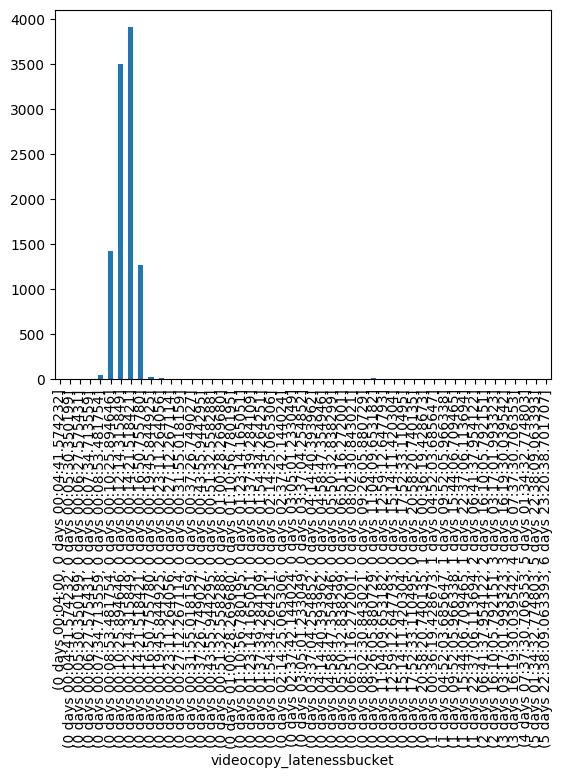

In [161]:

stpat_vidsaiout =stpat_vids.loc[stpat_vids['cam_name'] == 'cam1'].join(stpat_aiout.set_index('video_uri'), on='decrypted_path', how='left')
stpat_vidsaiout['videocopy_found_unable_to_copy'] = pandas.notna(stpat_vidsaiout['original_path']) & pandas.isna(stpat_vidsaiout['decrypted_path'])


stpat_vidsaiout['videocopy_lateness'] = stpat_vidsaiout['decrypted_datetime'] - stpat_vidsaiout['start_datetime']

stpat_vidsaiout['videocopy_ok'] = pandas.notna(stpat_vidsaiout['decrypted_path'])
# stpat_vidsaiout.loc[pandas.isna(stpat_vidsaiout['processing_uri'])]
stpat_vidsaiout['ai_vidok_but_did_not_try'] = stpat_vidsaiout['videocopy_ok'] & pandas.isna(stpat_vidsaiout['cocoannotations_uri'])
stpat_vidsaiout['ai_crash_no_output'] = stpat_vidsaiout['videocopy_ok'] & ~ stpat_vidsaiout['ai_vidok_but_did_not_try'] & (stpat_vidsaiout['status'] == 'queued')
stpat_vidsaiout['ai_outputed_but_cant_parse'] = stpat_vidsaiout['videocopy_ok'] & ~ stpat_vidsaiout['ai_vidok_but_did_not_try'] & (stpat_vidsaiout['status'] == 'parsing')


i = stpat_vidsaiout.loc[(stpat_vidsaiout['overallcount'] > 0) | (stpat_vidsaiout['detection_confidence'] > 0)].sort_values('overallruntimems')
# display_full(i)
smallest_runtimems_with_nonzero_detections = i.loc[i.index[0]]['overallruntimems']
print('smallest_runtimems_with_nonzero_detections',smallest_runtimems_with_nonzero_detections)

stpat_vidsaiout['ai_crash_output_too_fast'] = (stpat_vidsaiout['overallruntimems'] < 1).fillna(False)
stpat_vidsaiout['ai_ok'] = ((stpat_vidsaiout['overallruntimems'] > 1) & ((stpat_vidsaiout['status'] == 'done') | (stpat_vidsaiout['status'] == 'doneskiphalf'))).fillna(False)


# bad_boolean_rows_check = stpat_vidsaiout.loc[stpat_vidsaiout[['ai_vidok_but_did_not_try','ai_crash_no_output','ai_outputed_but_cant_parse','ai_crash_output_too_fast','ai_ok']].applymap(int).sum(axis=1) > 1]
# bad_boolean_rows_check
# display_full(stpat_vidsaiout.loc[stpat_vidsaiout['ai_vidok_but_did_not_try']])
# display_full(stpat_vidsaiout.loc[stpat_vidsaiout['ai_crash_no_output']])
# display_full(stpat_vidsaiout.loc[stpat_vidsaiout['ai_outputed_but_cant_parse']])
# display_full(stpat_vidsaiout.loc[stpat_vidsaiout['ai_crash_output_too_fast']])
# display_full(stpat_vidsaiout.loc[stpat_vidsaiout['ai_ok']])

stpat_vidsaiout.loc[stpat_vidsaiout['videocopy_lateness'] > timedelta(minutes=17)].sort_values('videocopy_lateness')

print('max lateness', stpat_vidsaiout['videocopy_lateness'].map(lambda x: x.total_seconds()/60).max())

min_lateness = 4
bins = numpy.logspace(math.log(min_lateness,10), math.log(1+stpat_vidsaiout['videocopy_lateness'].map(lambda x: x.total_seconds()/60).max(),10), num=50)
bins = list(map(lambda x: timedelta(minutes=x), bins))
bins
stpat_vidsaiout['videocopy_latenessbucket'] = pandas.cut(stpat_vidsaiout.loc[stpat_vidsaiout['videocopy_lateness'] > timedelta(minutes=min_lateness)]['videocopy_lateness'], bins=bins)
stpat_vidsaiout.groupby('videocopy_latenessbucket')['videocopy_lateness'].count().plot.bar()

In [162]:
stpat_vid_late_threshold=17
print('old ok count', stpat_vidsaiout['videocopy_ok'].value_counts())
stpat_vidsaiout['videocopy_late'] = (stpat_vidsaiout['videocopy_ok'] & (stpat_vidsaiout['videocopy_lateness'] > timedelta(minutes=stpat_vid_late_threshold)))
print('late count', stpat_vidsaiout['videocopy_late'].value_counts())
stpat_vidsaiout['videocopy_ok'] = stpat_vidsaiout.apply(lambda x: x['videocopy_ok'] and not x['videocopy_late'], axis=1)
print('new ok count', stpat_vidsaiout['videocopy_ok'].value_counts())

old ok count True     10174
False      128
Name: videocopy_ok, dtype: int64
late count False    10184
True       118
Name: videocopy_late, dtype: int64
new ok count True     10056
False      246
Name: videocopy_ok, dtype: int64


In [163]:
thaloslogs_stpatrick_uptime_ts_df = pandas.read_pickle('thaloslogs_stpatrick_uptime_ts_df.pickle')
thaloslogs_stpatrick_isup = thaloslogs_stpatrick_uptime_ts_df.loc[thaloslogs_stpatrick_uptime_ts_df['up'] == 1]
thaloslogs_stpatrick_isup = thaloslogs_stpatrick_isup.loc[thaloslogs_stpatrick_isup.index < '2024-04-08']
thaloslogs_stpatrick_isup['up']
stpat_vidsaiout2 = stpat_vidsaiout.join(thaloslogs_stpatrick_isup['up'], on='start_datetime', how='outer')
print("outer_join_disjointed count, thaloslogs thought it was down", len(stpat_vidsaiout2.loc[stpat_vidsaiout2['up'].isna()]))
print("outer_join_disjointed count, thaloslogs thought it was up", len(stpat_vidsaiout2.loc[stpat_vidsaiout2['original_path'].isna()]))
stpat_vidsaiout2['videocopy_no_video'] = stpat_vidsaiout2['original_path'].isna()
for col in ['videocopy_found_unable_to_copy','videocopy_ok','videocopy_late','ai_vidok_but_did_not_try','ai_crash_no_output','ai_outputed_but_cant_parse','ai_crash_output_too_fast','ai_ok']:
    stpat_vidsaiout2[col] = stpat_vidsaiout2[col].fillna(False)
# display_full(stpat_vidsaiout2.loc[stpat_vidsaiout2['videocopy_no_video']])
# display_full(stpat_vidsaiout2)

outer_join_disjointed count, thaloslogs thought it was down 254
outer_join_disjointed count, thaloslogs thought it was up 4221


In [164]:
a = branc_vidsaiout2[['original_path','decrypted_datetime','start_datetime','status','videocopy_no_video','videocopy_found_unable_to_copy','videocopy_late','videocopy_ok','ai_vidok_but_did_not_try','ai_crash_no_output','ai_outputed_but_cant_parse','ai_crash_output_too_fast','ai_ok']]
b = stpat_vidsaiout2[['original_path','decrypted_datetime','start_datetime','status','videocopy_no_video','videocopy_found_unable_to_copy','videocopy_late','videocopy_ok','ai_vidok_but_did_not_try','ai_crash_no_output','ai_outputed_but_cant_parse','ai_crash_output_too_fast','ai_ok']]
# display_full(a)

c = a.append(b, ignore_index=True)

c.to_pickle('integration_state_evaluations_videocopy_ai.pickle')

# show rows with at least one NA
# display_full(c.loc[c.applymap(pandas.isna).any(axis=1)])
# display_full(c.loc[(c['videocopy_no_video']) & (c['start_datetime'] < pandas.Timestamp('2024-01-13 00:00:00+00:00'))].sort_values('start_datetime') )
print("disk outage accounts for max",
      len(c.loc[(c['videocopy_no_video']) & (c['start_datetime'] < pandas.Timestamp('2024-01-13 00:00:00+00:00'))]),
      " out of ", 
      len(c.loc[(c['videocopy_no_video'])]))
# print(len(b.loc[(b['videocopy_no_video']) & (b['start_datetime'] < pandas.Timestamp('2024-01-13 00:00:00+00:00'))]))

# print(len(a.loc[(a['videocopy_no_video']) & (a['start_datetime'] > pandas.Timestamp('2024-01-13 00:00:00+00:00')) & (a['start_datetime'] < pandas.Timestamp('2024-02-01 00:00:00+00:00'))]))
# print(len(b.loc[(b['videocopy_no_video']) & (b['start_datetime'] > pandas.Timestamp('2024-01-13 00:00:00+00:00')) & (b['start_datetime'] < pandas.Timestamp('2024-02-01 00:00:00+00:00'))]))
                
# print(len(a.loc[(a['videocopy_no_video']) & (a['start_datetime'] > pandas.Timestamp('2024-02-01 00:00:00+00:00')) & (a['start_datetime'] < pandas.Timestamp('2024-03-01 00:00:00+00:00'))]))
# print(len(b.loc[(b['videocopy_no_video']) & (b['start_datetime'] > pandas.Timestamp('2024-02-01 00:00:00+00:00')) & (b['start_datetime'] < pandas.Timestamp('2024-03-01 00:00:00+00:00'))]))
                
# print(len(a.loc[(a['videocopy_no_video']) & (a['start_datetime'] > pandas.Timestamp('2024-03-01 00:00:00+00:00')) & (a['start_datetime'] < pandas.Timestamp('2024-04-07 00:00:00+00:00'))]))
# print(len(b.loc[(b['videocopy_no_video']) & (b['start_datetime'] > pandas.Timestamp('2024-03-01 00:00:00+00:00')) & (b['start_datetime'] < pandas.Timestamp('2024-04-07 00:00:00+00:00'))]))

# display_full(c.loc[c['ai_crash_output_too_fast']].sort_values('start_datetime'))

disk outage accounts for max 3686  out of  7693


In [165]:
stpat_gpsdata = awswrangler.athena.read_sql_query(f"SELECT * from stpatrick_v1_gpsdata where datetime > '2024-01-01' and gps_datetime > '2024-01-01'", database='tnc_edge')
for col in ['datetime', 'gps_datetime']:
    stpat_gpsdata[col] = pandas.to_datetime(stpat_gpsdata[col], utc=True)
for col in ['lat', 'lon']:
    stpat_gpsdata[col] = pandas.to_numeric(stpat_gpsdata[col])
stpat_gpsdata = stpat_gpsdata[['datetime', 'gps_datetime','lat', 'lon']]
stpat_gpsdata

,datetime,gps_datetime,lat,lon
0,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:44:32+00:00,8.033022,-87.235744
1,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:45:32+00:00,8.033244,-87.235008
2,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:46:32+00:00,8.033371,-87.233619
3,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:47:32+00:00,8.033710,-87.232121
4,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:48:32+00:00,8.033970,-87.230584
5,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:49:32+00:00,8.034258,-87.229060
6,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:50:32+00:00,8.034381,-87.228130
7,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:51:32+00:00,8.034607,-87.227481
8,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:52:32+00:00,8.034830,-87.226243
9,2024-02-08 09:02:52.756749+00:00,2024-02-08 08:53:32+00:00,8.035119,-87.224869


max lateness 10040.593448616668
using lateness cutoff of 21minutes


,datetime,gps_datetime,lat,lon,lateness,latenessbucket,just_before_downevent,just_after_downevent,gps_late_integration_err
11140,2024-03-30 10:41:01.743578+00:00,2024-03-30 10:19:07+00:00,5.826888,-91.250604,0 days 00:21:54.743578,"(0 days 00:21:12, 0 days 00:22:07.371323]",False,False,True
11237,2024-02-18 18:04:09.494441+00:00,2024-02-18 17:42:09+00:00,7.727831,-87.432124,0 days 00:22:00.494441,"(0 days 00:21:12, 0 days 00:22:07.371323]",False,False,True
13279,2024-02-19 12:24:26.117411+00:00,2024-02-19 12:03:02+00:00,7.666430,-87.391473,0 days 00:21:24.117411,"(0 days 00:21:12, 0 days 00:22:07.371323]",False,False,True
16176,2024-02-18 14:14:30.572926+00:00,2024-02-18 13:47:07+00:00,7.881114,-87.644605,0 days 00:27:23.572926,"(0 days 00:27:22.551626, 0 days 00:28:34.053400]",False,False,True
16177,2024-02-18 14:14:30.572926+00:00,2024-02-18 13:48:07+00:00,7.880123,-87.643264,0 days 00:26:23.572926,"(0 days 00:26:14.032549, 0 days 00:27:22.551626]",False,False,True
16178,2024-02-18 14:14:30.572926+00:00,2024-02-18 13:49:07+00:00,7.879099,-87.641920,0 days 00:25:23.572926,"(0 days 00:25:08.371748, 0 days 00:26:14.032549]",False,False,True
16179,2024-02-18 14:14:30.572926+00:00,2024-02-18 13:50:07+00:00,7.878087,-87.640550,0 days 00:24:23.572926,"(0 days 00:24:05.449988, 0 days 00:25:08.371748]",False,False,True
16180,2024-02-18 14:14:30.572926+00:00,2024-02-18 13:51:07+00:00,7.877070,-87.639176,0 days 00:23:23.572926,"(0 days 00:23:05.153011, 0 days 00:24:05.449988]",False,False,True
16181,2024-02-18 14:14:30.572926+00:00,2024-02-18 13:52:07+00:00,7.876056,-87.637791,0 days 00:22:23.572926,"(0 days 00:22:07.371323, 0 days 00:23:05.153011]",False,False,True
16182,2024-02-18 14:14:30.572926+00:00,2024-02-18 13:53:07+00:00,7.875041,-87.636414,0 days 00:21:23.572926,"(0 days 00:21:12, 0 days 00:22:07.371323]",False,False,True


len 71367
num of int errors 842
num of ok  70525
num of errors on boundary 908


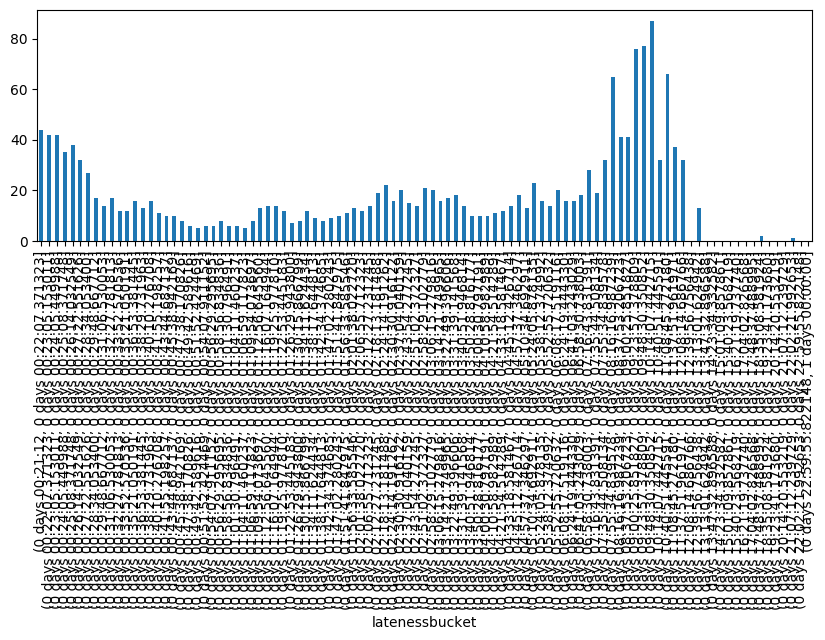

In [166]:
stpat_gpsdata['lateness'] = stpat_gpsdata['datetime'] - stpat_gpsdata['gps_datetime']
stpat_gpsdata

stpat_gpsdata.loc[stpat_gpsdata['lateness'] > timedelta(minutes=30)].sort_values('lateness')

print('max lateness', stpat_gpsdata['lateness'].map(lambda x: x.total_seconds()/60).max())

min_lateness = 21.2
max_lateness = 1440 # 1 day
# bins = numpy.logspace(math.log(min_lateness,10), math.log(1+stpat_gpsdata['lateness'].map(lambda x: x.total_seconds()/60).max(),10), num=100)
bins = numpy.logspace(math.log(min_lateness,10), math.log(max_lateness,10), num=100)
bins = list(map(lambda x: timedelta(minutes=x), bins))
bins
stpat_gpsdata['latenessbucket'] = pandas.cut(stpat_gpsdata.loc[stpat_gpsdata['lateness'] > timedelta(minutes=min_lateness)]['lateness'], bins=bins)
stpat_gpsdata.groupby('latenessbucket')['lateness'].count().plot.bar(figsize=(10,3))

print("using lateness cutoff of 21minutes")

thaloslogs_stpatrick_uptime_ts_df = pandas.read_pickle('thaloslogs_stpatrick_uptime_ts_df.pickle')
thaloslogs_stpatrick_downevent = thaloslogs_stpatrick_uptime_ts_df.loc[thaloslogs_stpatrick_uptime_ts_df['status'] == ' down']

thaloslogs_stpatrick_downevent = thaloslogs_stpatrick_downevent.loc[thaloslogs_stpatrick_downevent.index < '2024-04-08']
downevent_dts = thaloslogs_stpatrick_downevent.loc[thaloslogs_stpatrick_downevent['datetime'].notna()]['datetime']
downevent_dts = pandas.to_datetime(downevent_dts, utc=True)

testtime = datetime.fromisoformat('2024-01-03T22:29:41+00:00').astimezone(timezone.utc)

# pandas.to_datetime(datetime.now().astimezone(timezone.utc))
# pandas.to_datetime(downevent_dts, utc=True)
# downevent_dts.map(lambda y: abs((testtime - y).total_seconds()) < 21*60).any()


#following works, but is very slow
# stpat_gpsdata['near_down_event'] = stpat_gpsdata['gps_datetime'].map(lambda x: downevent_dts.map(lambda y: abs((x - y).total_seconds()) < 21*60).any())

td_21m = timedelta(minutes=21, seconds=12)
#following works, is slightly less slow
stpat_gpsdata['just_before_downevent'] = stpat_gpsdata['gps_datetime'].map(lambda x: ((downevent_dts >= x - td_21m) & (downevent_dts <= x )).any() )
stpat_gpsdata['just_after_downevent'] = stpat_gpsdata['gps_datetime'].map(lambda x: ((downevent_dts >= x ) & (downevent_dts <= x + td_21m)).any() )


stpat_gpsdata['gps_late_integration_err'] = (stpat_gpsdata['lateness'] > td_21m ) & (stpat_gpsdata['just_after_downevent'] == False)
display(stpat_gpsdata.loc[stpat_gpsdata['gps_late_integration_err']])
# stpat_gpsdata.loc[(stpat_gpsdata['lateness'] > td_21m ) & (stpat_gpsdata['just_after_downevent'] == True)].sort_values('gps_datetime')

# stpat_gpsdata['status'] = stpat_gpsdata.apply(lambda x: thaloslogs_stpatrick_uptime_ts_df.loc[x['gps_datetime'].replace(minute=math.floor(x['gps_datetime'].minute/5)*5,second=0)]['status'],axis=1)
# display(stpat_gpsdata.loc[(stpat_gpsdata['lateness'] > td_21m ) & (stpat_gpsdata['status'] == ' down')])

# if I were to declare that on status == 'down' there is no integration error, I would only save like 14 rows. Not worth my time.


print('len', len(stpat_gpsdata['gps_late_integration_err']))
print('num of int errors', stpat_gpsdata['gps_late_integration_err'].sum())
print('num of ok ', (stpat_gpsdata['gps_late_integration_err'] == False).sum())
print('num of errors on boundary', ((stpat_gpsdata['lateness'] > td_21m ) & ((stpat_gpsdata['just_before_downevent'] == True) | (stpat_gpsdata['just_after_downevent'] == True)) ).sum())


In [167]:
# display_full(stpat_gpsdata.loc[stpat_gpsdata['lateness'] > td_21m].sort_values('lateness'))
print("bef" , len(stpat_gpsdata.loc[stpat_gpsdata['just_before_downevent']]))
# display_full(stpat_gpsdata.loc[stpat_gpsdata['just_before_downevent']].sort_values('gps_datetime'))
print("aft" ,len(stpat_gpsdata.loc[stpat_gpsdata['just_after_downevent']]))
# display_full(stpat_gpsdata.loc[stpat_gpsdata['just_after_downevent']].sort_values('gps_datetime'))
thaloslogs_stpatrick_uptime_ts_df['datetime'] = pandas.to_datetime(thaloslogs_stpatrick_uptime_ts_df['datetime'], utc=True)
updownevents = thaloslogs_stpatrick_uptime_ts_df[thaloslogs_stpatrick_uptime_ts_df['datetime'].notna()].set_index('datetime')

stpat_gpsdata2 = stpat_gpsdata.set_index('gps_datetime')
stpat_gpsdata2 = stpat_gpsdata2.join(updownevents, how='outer')
stpat_gpsdata2 = stpat_gpsdata2.sort_index()
stpat_gpsdata2['status'] = stpat_gpsdata2['status'].ffill()
# display_full(stpat_gpsdata2.loc[(stpat_gpsdata2['status'] == ' down') | (stpat_gpsdata2['status'].shift(1) == ' down') | (stpat_gpsdata2['status'].shift(-1) == ' down')])

bef 2456
aft 3564


In [168]:
branc_gpsdata = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_gpsdata where datetime > '2024-01-01' and gps_datetime > '2024-01-01'", database='tnc_edge')
for col in ['datetime', 'gps_datetime']:
    branc_gpsdata[col] = pandas.to_datetime(branc_gpsdata[col], utc=True)
for col in ['lat', 'lon']:
    branc_gpsdata[col] = pandas.to_numeric(branc_gpsdata[col])
branc_gpsdata = branc_gpsdata[['datetime', 'gps_datetime','lat', 'lon']]
branc_gpsdata

,datetime,gps_datetime,lat,lon
0,2024-01-20 09:14:32.731051+00:00,2024-01-20 08:59:37+00:00,8.277280,-84.209912
1,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:00:37+00:00,8.277208,-84.209868
2,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:01:37+00:00,8.277111,-84.209823
3,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:07:37+00:00,8.276684,-84.209457
4,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:09:37+00:00,8.276491,-84.209343
5,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:12:37+00:00,8.276291,-84.209121
6,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:13:37+00:00,8.276221,-84.209051
7,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:02:37+00:00,8.277056,-84.209764
8,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:03:37+00:00,8.276974,-84.209677
9,2024-01-20 09:14:32.731051+00:00,2024-01-20 09:04:37+00:00,8.276871,-84.209634


max lateness 10893.369384566668
using lateness cutoff of 21minutes
branc num of lates where because down 139
branc num of lates where because before_down 67
len 67052
num of int errors 4732
num of ok  62320
num of errors on boundary 639


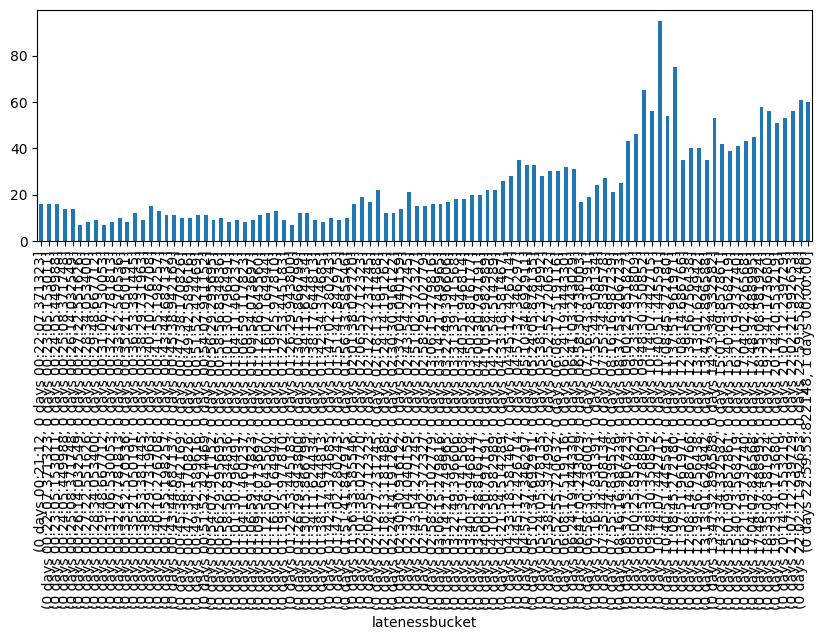

In [171]:
branc_gpsdata['lateness'] = branc_gpsdata['datetime'] - branc_gpsdata['gps_datetime']
branc_gpsdata

branc_gpsdata.loc[branc_gpsdata['lateness'] > timedelta(minutes=30)].sort_values('lateness')

print('max lateness', branc_gpsdata['lateness'].map(lambda x: x.total_seconds()/60).max())

min_lateness = 21.2
max_lateness = 1440 # 1 day
# bins = numpy.logspace(math.log(min_lateness,10), math.log(1+branc_gpsdata['lateness'].map(lambda x: x.total_seconds()/60).max(),10), num=100)
bins = numpy.logspace(math.log(min_lateness,10), math.log(max_lateness,10), num=100)
bins = list(map(lambda x: timedelta(minutes=x), bins))
bins
branc_gpsdata['latenessbucket'] = pandas.cut(branc_gpsdata.loc[branc_gpsdata['lateness'] > timedelta(minutes=min_lateness)]['lateness'], bins=bins)
branc_gpsdata.groupby('latenessbucket')['lateness'].count().plot.bar(figsize=(10,3))

print("using lateness cutoff of 21minutes")

thaloslogs_brancol_uptime_ts_df = pandas.read_pickle('thaloslogs_brancol_uptime_ts_df.pickle')
thaloslogs_brancol_downevent = thaloslogs_brancol_uptime_ts_df.loc[thaloslogs_brancol_uptime_ts_df['status'] == ' down']

thaloslogs_brancol_downevent = thaloslogs_brancol_downevent.loc[thaloslogs_brancol_downevent.index < '2024-04-08']
downevent_dts = thaloslogs_brancol_downevent.loc[thaloslogs_brancol_downevent['datetime'].notna()]['datetime']
downevent_dts = pandas.to_datetime(downevent_dts, utc=True)

testtime = datetime.fromisoformat('2024-01-03T22:29:41+00:00').astimezone(timezone.utc)

# pandas.to_datetime(datetime.now().astimezone(timezone.utc))
# pandas.to_datetime(downevent_dts, utc=True)
# downevent_dts.map(lambda y: abs((testtime - y).total_seconds()) < 21*60).any()


#following works, but is very slow
# branc_gpsdata['near_down_event'] = branc_gpsdata['gps_datetime'].map(lambda x: downevent_dts.map(lambda y: abs((x - y).total_seconds()) < 21*60).any())

td_21m = timedelta(minutes=21, seconds=12)

#following works, is slightly less slow
branc_gpsdata['just_before_downevent'] = branc_gpsdata['gps_datetime'].map(lambda x: ((downevent_dts >= x - td_21m) & (downevent_dts <= x )).any() )
branc_gpsdata['just_after_downevent'] = branc_gpsdata['gps_datetime'].map(lambda x: ((downevent_dts >= x ) & (downevent_dts <= x + td_21m)).any() )


branc_gpsdata['status'] = branc_gpsdata.apply(lambda x: thaloslogs_brancol_uptime_ts_df.loc[x['gps_datetime'].replace(minute=math.floor(x['gps_datetime'].minute/5)*5,second=0)]['status'],axis=1)

print('branc num of lates where because down', len(branc_gpsdata.loc[(branc_gpsdata['lateness'] > td_21m ) & (branc_gpsdata['status'] == ' down')]))
print('branc num of lates where because before_down', len(branc_gpsdata.loc[(branc_gpsdata['lateness'] > td_21m ) & (branc_gpsdata['just_before_downevent'])]))
# if I were to declare that on status == 'down' there is no integration error, I would only save like 14 rows. Not worth my time.

branc_gpsdata['gps_late_integration_err'] = (branc_gpsdata['lateness'] > td_21m ) & (branc_gpsdata['just_after_downevent'] == False) & (branc_gpsdata['just_before_downevent'] == False) & (branc_gpsdata['status'] == ' up') 
# display_full(branc_gpsdata.loc[branc_gpsdata['gps_late_integration_err']].sort_values('gps_datetime'))
# branc_gpsdata.loc[(branc_gpsdata['lateness'] > td_21m ) & (branc_gpsdata['just_after_downevent'] == True)].sort_values('gps_datetime')


print('len', len(branc_gpsdata['gps_late_integration_err']))
print('num of int errors', branc_gpsdata['gps_late_integration_err'].sum())
print('num of ok ', (branc_gpsdata['gps_late_integration_err'] == False).sum())
print('num of errors on boundary', ((branc_gpsdata['lateness'] > td_21m ) & ((branc_gpsdata['just_before_downevent'] == True) | (branc_gpsdata['just_after_downevent'] == True)) ).sum())


In [ ]:
from pathlib import Path
from collections import defaultdict
import json

a='brancol_jan_aifishoutput'
b='brancol_feb_aifish_output'
c='brancol_mar_aifish_output'

aiff = [ x for i in [a, b, c] for x in Path(i).iterdir() ]

aiff = pandas.DataFrame({'f': aiff})
# len(aiff)
aiff['name'] = aiff['f'].apply(lambda x: x.name)
aiff = aiff.loc[aiff['name'].apply(lambda x: x.endswith('.json'))]
aiff['forjoin'] = aiff['name'].apply(lambda x: '/videos/output/' + x)

def do_fcnt_allcnt_mdc(f: Path):
    with f.open() as d:
        try:
            detections = [json.loads(line) for line in d]

            if len(detections) == 0:
                # error handling here
                return (0, 0, 0)

            fish_detections = list(filter(lambda d: d.get('class_name') == 'fish', detections))

            if len(fish_detections) == 0:
                # error handling here
                return (0, len(detections), 0)

            detectionconfidences = list(filter(lambda x: x is not None, map(lambda d: d.get('object_confidence'), fish_detections)))
            # = max(map(lambda detection: detection.get('object_confidence'), detections))
            # trackedconfidences = []

            tracks = defaultdict(list)
            for d in fish_detections:
                tracks[d.get('track')].append(d)

            cnt = len(tracks.keys())

            if len(detectionconfidences) > 0:
                meandetectionconfidence = float(sum(detectionconfidences)) / float(len(detectionconfidences))
            else:
                meandetectionconfidence = 0
            
            return (cnt, len(detections), meandetectionconfidence)
                
        except json.JSONDecodeError:
            print('json error in ' + f.name)
        

aiff['fcnt_allcnt_mdc'] = aiff['f'].apply(do_fcnt_allcnt_mdc)
aiff
# branc_vidsaiout[output_uri]

In [212]:
aiff['fcnt'] = aiff['fcnt_allcnt_mdc'].apply(lambda x: pandas.NA if x is None else x[0])
aiff['allcnt'] = aiff['fcnt_allcnt_mdc'].apply(lambda x: pandas.NA if x is None else x[1])
aiff['mdc'] = aiff['fcnt_allcnt_mdc'].apply(lambda x: pandas.NA if x is None else x[2])

display(branc_vidsaiout.columns)

toofast_df = branc_vidsaiout.join(aiff.set_index('forjoin'), on='output_uri')

print('matchingcounts', (toofast_df['fcnt'] == toofast_df['count']).sum())
print('nonmatchingcounts', (toofast_df['fcnt'] != toofast_df['count']).sum())
print('nonmatchingcounts higher', (toofast_df['fcnt'] > toofast_df['count']).sum())
print('nonmatchingcounts lower', (toofast_df['fcnt'] < toofast_df['count']).sum())
print('0fish,somenonfish', ((toofast_df['fcnt'] == 0 ) & ( toofast_df['allcnt'] > 0)).sum())


print('nonmatchingcounts that match toofast', ((toofast_df['fcnt'] != toofast_df['count']) & (toofast_df['ai_crash_output_too_fast'])).sum())
print('somenonefish that match toofast', (( toofast_df['allcnt'] > 0) & (toofast_df['ai_crash_output_too_fast'])).sum())
print('legit toofast', ((toofast_df['fcnt'] == toofast_df['count']) & (toofast_df['allcnt'] == toofast_df['count']) & (toofast_df['ai_crash_output_too_fast'])).sum())
toofast_df.loc[(toofast_df['fcnt'] == toofast_df['count']) & (toofast_df['allcnt'] == toofast_df['count']) & (toofast_df['ai_crash_output_too_fast'])][['start_datetime', 'output_uri', 'datetime',
       'count', 'runtimems', 'detection_confidence', 'status',
       'videocopy_found_unable_to_copy', 'videocopy_lateness', 'videocopy_ok',
       'ai_vidok_but_did_not_try', 'ai_crash_no_output',
       'ai_outputed_but_cant_parse', 'ai_crash_output_too_fast', 'ai_ok',
       'videocopy_latenessbucket', 'videocopy_late',
       'fcnt','allcnt', 'mdc']]

Index(['original_path', 'last_modified', 'decrypted_path',
       'decrypted_datetime', 'stdout', 'stderr', 'start_datetime', 'cam_name',
       'reencoded_path', 'reencoded_datetime', 'reencoded_stdout',
       'reencoded_stderr', 'id', 'processing_uri', 'output_uri', 'datetime',
       'count', 'runtimems', 'detection_confidence', 'status',
       'videocopy_found_unable_to_copy', 'videocopy_lateness', 'videocopy_ok',
       'ai_vidok_but_did_not_try', 'ai_crash_no_output',
       'ai_outputed_but_cant_parse', 'ai_crash_output_too_fast', 'ai_ok',
       'videocopy_latenessbucket', 'videocopy_late'],
      dtype='object')

matchingcounts 8930
nonmatchingcounts 1220
nonmatchingcounts higher 178
nonmatchingcounts lower 0
0fish,somenonfish 2339
nonmatchingcounts that match toofast 113
somenonefish that match toofast 247
legit toofast 3751


,start_datetime,output_uri,datetime,count,runtimems,detection_confidence,status,videocopy_found_unable_to_copy,videocopy_lateness,videocopy_ok,ai_vidok_but_did_not_try,ai_crash_no_output,ai_outputed_but_cant_parse,ai_crash_output_too_fast,ai_ok,videocopy_latenessbucket,videocopy_late,fcnt,allcnt,mdc
1,2024-01-24 02:20:00+00:00,/videos/output/20240124T022000Z_cam1.json,2024-01-24 02:33:13.192866+00:00,0.0,7.999897,0.0,done,False,0 days 00:10:06.669486,True,False,False,False,True,False,"(0 days 00:09:17.145520, 0 days 00:10:53.278637]",False,0,0,0
2,2024-01-24 01:35:00+00:00,/videos/output/20240124T013500Z_cam1.json,2024-01-24 01:48:03.589178+00:00,0.0,16.000986,0.0,done,False,0 days 00:08:50.532658,True,False,False,False,True,False,"(0 days 00:07:55.158857, 0 days 00:09:17.145520]",False,0,0,0
4,2024-01-24 01:40:00+00:00,/videos/output/20240124T014000Z_cam1.json,2024-01-24 01:53:04.656269+00:00,0.0,12.000322,0.0,done,False,0 days 00:08:59.558096,True,False,False,False,True,False,"(0 days 00:07:55.158857, 0 days 00:09:17.145520]",False,0,0,0
6,2024-01-24 01:45:00+00:00,/videos/output/20240124T014500Z_cam1.json,2024-01-24 01:58:05.666400+00:00,0.0,12.000322,0.0,done,False,0 days 00:09:08.330288,True,False,False,False,True,False,"(0 days 00:07:55.158857, 0 days 00:09:17.145520]",False,0,0,0
8,2024-01-24 01:50:00+00:00,/videos/output/20240124T015000Z_cam1.json,2024-01-24 02:03:06.625442+00:00,0.0,12.000322,0.0,done,False,0 days 00:09:17.421311,True,False,False,False,True,False,"(0 days 00:09:17.145520, 0 days 00:10:53.278637]",False,0,0,0
10,2024-01-24 01:55:00+00:00,/videos/output/20240124T015500Z_cam1.json,2024-01-24 02:08:07.790395+00:00,0.0,11.999607,0.0,done,False,0 days 00:09:26.478500,True,False,False,False,True,False,"(0 days 00:09:17.145520, 0 days 00:10:53.278637]",False,0,0,0
12,2024-01-24 02:00:00+00:00,/videos/output/20240124T020000Z_cam1.json,2024-01-24 02:13:08.804214+00:00,0.0,7.999659,0.0,done,False,0 days 00:09:34.969465,True,False,False,False,True,False,"(0 days 00:09:17.145520, 0 days 00:10:53.278637]",False,0,0,0
14,2024-01-24 02:05:00+00:00,/videos/output/20240124T020500Z_cam1.json,2024-01-24 02:18:10.031165+00:00,0.0,11.999845,0.0,done,False,0 days 00:09:43.334880,True,False,False,False,True,False,"(0 days 00:09:17.145520, 0 days 00:10:53.278637]",False,0,0,0
16,2024-01-24 02:10:00+00:00,/videos/output/20240124T021000Z_cam1.json,2024-01-24 02:23:11.039291+00:00,0.0,12.000084,0.0,done,False,0 days 00:09:51.586270,True,False,False,False,True,False,"(0 days 00:09:17.145520, 0 days 00:10:53.278637]",False,0,0,0
19,2024-01-24 02:15:00+00:00,/videos/output/20240124T021500Z_cam1.json,2024-01-24 02:28:12.127124+00:00,0.0,12.000084,0.0,done,False,0 days 00:09:58.014403,True,False,False,False,True,False,"(0 days 00:09:17.145520, 0 days 00:10:53.278637]",False,0,0,0


In [214]:
rug = pandas.read_pickle('integration_state_evaluations_videocopy_ai.pickle')
print('aitoofast', rug['ai_crash_output_too_fast'].sum())
print('aitoofast', (~rug['ai_crash_output_too_fast']).sum())

aitoofast 4024
aitoofast 24121
